# DATA WRANGLING PROJECT 
## House Rental
This notebook consists of the wrangling involved in `House Rental`

The steps are as follows:
 1. Loading and renaming the dataset
 2. Aggregating the columns
 3. Reshaping the dataframe into common structure
 4. Export into csv

In [14]:
#Loading the required libraries:
library (tidyverse)
library(lubridate)
library(ggplot2)

### Loading and Renaming the dataset

In [15]:
#Reading CSV file into dataframe

base_csv <- read_csv( "F:/UoC/MADS/DATA422 - Data Wrangling/Project/SampleDatasets/ta-mean-rents.csv",
                col_types = cols(Month = col_date() #converting the field into date datatype
                    )) 

#Since the values arre spreaded, we are using `gather()` below and renaming it
unclean_df <- base_csv %>% gather("NZ_City", "Rent", 2:74)
clean_df <- rename(unclean_df, Date = Month)

### Aggregating the columns

In [16]:
#function to create Year,Month,Quarter(ymq)
add_ymq <- function(df){
            df %>%
                mutate(Year = year(df$Date), 
                       Month = month(df$Date),
                       Quarter = zoo::as.yearqtr(df$Date, format = "%Y-%m-%d")) %>%
                select(-c("Date")) %>% select(c(3,4,5,1,2))
    }

#function to calculate avg rent
add_avgrent <- function(df){
                df %>%
                    group_by(Year,Quarter,Month,NZ_City) %>%
                    summarise(Avg = mean(Rent)) }

### Reshaping the dataframe into common structure
so that it can be used in the data model with the rest of the enities.

In [17]:
final <- clean_df %>% add_ymq()  %>% add_avgrent() %>% na.omit()

final %>% glimpse()

Observations: 23,112
Variables: 5
Groups: Year, Quarter, Month [321]
$ Year    <dbl> 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,...
$ Quarter <yearqtr> 1993 Q1, 1993 Q1, 1993 Q1, 1993 Q1, 1993 Q1, 1993 Q1, 1...
$ Month   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ NZ_City <chr> "Ashburton District", "Auckland", "Buller District", "Carte...
$ Avg     <dbl> 112, 200, 92, 92, 98, 152, 80, 145, 134, 165, 122, 86, 105,...


In [18]:
final %>% head()

Year,Quarter,Month,NZ_City,Avg
<dbl>,<yearqtr>,<dbl>,<chr>,<dbl>
1993,1993 Q1,1,Ashburton District,112
1993,1993 Q1,1,Auckland,200
1993,1993 Q1,1,Buller District,92
1993,1993 Q1,1,Carterton District,92
1993,1993 Q1,1,Central Otago District,98
1993,1993 Q1,1,Christchurch,152


### Export into csv

The below exported file is further used in `section -3 of 'IVS.pynb'` that has IVS data for further analysis.

In [ ]:
write_csv(final,"F:/UoC/MADS/DATA422 - Data Wrangling/Project/Output/Rental.csv")

### Visualization and Inferences

Lets make some visualization from the final data to analyze further

In [27]:
#creating a dataframe for plotting area chart
vis1_HR <- final %>% filter(Year >= 2014) %>% filter(NZ_City == "Christchurch" | NZ_City == "Auckland" | NZ_City == "Wellington" | NZ_City == "Queenstown-Lakes District") %>% 
                    select(Year,NZ_City,Avg) %>% 
                    group_by(Year,NZ_City) %>% 
                    summarise(Avg_HouseRental = mean(Avg))
vis1_HR

Adding missing grouping variables: `Quarter`, `Month`


Year,NZ_City,Avg_HouseRental
<dbl>,<chr>,<dbl>
2014,Auckland,476.0000
2014,Christchurch,414.3333
2014,Queenstown-Lakes District,403.3333
2014,Wellington,435.5000
2015,Auckland,506.4167
2015,Christchurch,400.5833
2015,Queenstown-Lakes District,441.8333
2015,Wellington,440.8333
2016,Auckland,528.9167


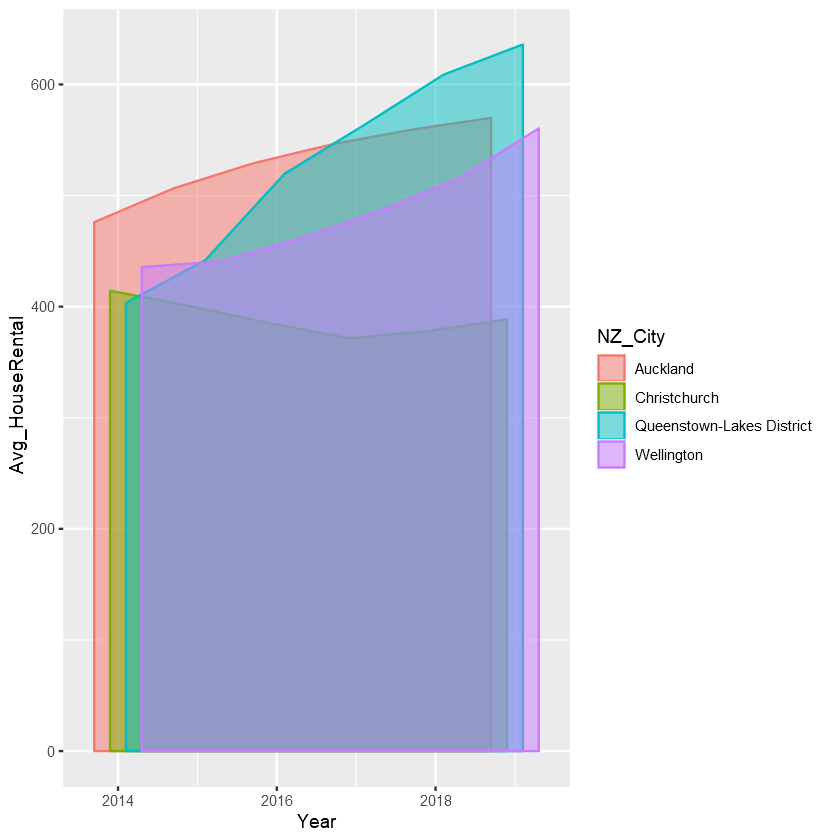

In [29]:
#A area chart that compares the average hosue rentals among 4 New Zealand cities in the last 6 years.

ggplot(vis1_HR, aes(x = Year, y = Avg_HouseRental)) + 
  geom_area(aes(color = NZ_City, fill = NZ_City), 
            alpha = 0.5, position = position_dodge(0.8))

#### After executing this notebook, go to <b>`read_me.txt`</b> to execute the next notebook.

If you have `already executed` all the other notebooks, `then` go to `section -3 in 'IVS.pynb'` that has IVS data